In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 866.5 kB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 165.8/165.8 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Using cached jedi-0.19.1-py2.py3-none-any.whl.metadata (22 kB)
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.4/50.4 kB 739.0 kB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 486.1/486.1 kB 6.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.8/21.8 MB 42.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.0/82.0 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.2/302.2 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 55.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 80.7/80.7 kB 5.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import statsmodels.api as sm
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error
import imageio
import os
from statsmodels.graphics.tsaplots import plot_acf
import pandas as pd
import plotly.express as px

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Cargar el archivo Excel
file_path = '/content/drive/MyDrive/Fundamentos/df_pivot_top10.xlsx'  # Cambia esto por la ruta de tu archivo
df = pd.read_excel(file_path)

# Ver las primeras filas del DataFrame para entender su estructura
print(df)

      mes_año  MLA1625102786  MLA1658680930  MLA875271085  MLA896621470  \
0  2022-05-01             81             16            18            23   
1  2022-06-01             59              4             6            14   
2  2022-07-01             65             47            25            25   
3  2022-08-01             72             87             4            36   
4  2022-09-01            142             60            17            32   
5  2022-10-01            265            189            31            47   
6  2022-11-01            349            213            52            50   
7  2022-12-01            386            284            44            58   
8  2023-01-01             71             85            32            83   
9  2023-02-01             83             52            30            59   
10 2023-03-01             62             71            47            94   
11 2023-04-01             54             85            34           110   
12 2023-05-01            

<Axes: xlabel='mes_año'>

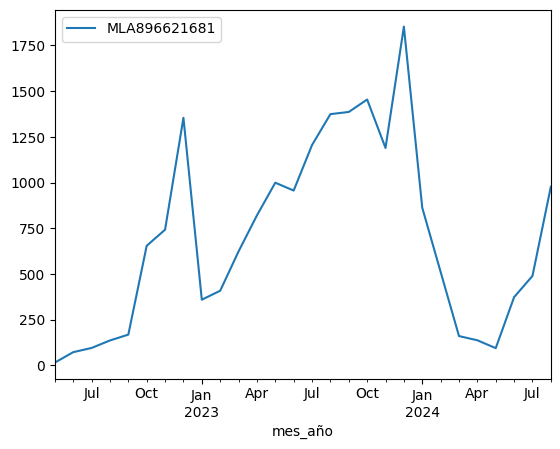

In [5]:
# plot the dataset (con el numero de publicacion que se va a modelar)
df.plot(x="mes_año", y=["MLA896621681"])

In [6]:
# extract month and year from dates**
df['Mes'] = [i.month for i in df['mes_año']]
df['Año'] = [i.year for i in df['mes_año']]

# create a sequence of numbers
df['Series'] = np.arange(1,len(df)+1)

# drop unnecessary columns and re-arrange
df.drop(['mes_año'], axis=1, inplace=True)
df = df[['Series', 'Año', 'Mes', 'MLA896621681']]

# check the head of the dataset**
df.head()

,Series,Año,Mes,MLA896621681
0,1,2022,5,15
1,2,2022,6,72
2,3,2022,7,95
3,4,2022,8,136
4,5,2022,9,168


In [7]:
# Iniciar pycaret. El target se tiene que modificar para correr el modelo con cada producto.
from pycaret.time_series import *
s = setup(df,target= 'MLA896621681')

,Description,Value
0,session_id,1776
1,Target,MLA896621681
2,Approach,Univariate
3,Exogenous Variables,Present
4,Original data shape,"(28, 4)"
5,Transformed data shape,"(28, 4)"
6,Transformed train set shape,"(27, 4)"
7,Transformed test set shape,"(1, 4)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


In [8]:
# Crear y comparar modelos
modelos_comparados = compare_models(sort = 'MAPE')

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,TT (Sec)
ada_cds_dt,AdaBoost w/ Cond. Deseasonalize & Detrending,0.4559,0.3066,118.7491,118.7491,0.5166,0.5567,0.1900
dt_cds_dt,Decision Tree w/ Cond. Deseasonalize & Detrending,0.5498,0.3703,143.1076,143.1076,0.5664,0.6134,0.2067
xgboost_cds_dt,Extreme Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.7470,0.5041,194.2294,194.2294,0.6710,0.7696,0.1933
et_cds_dt,Extra Trees w/ Cond. Deseasonalize & Detrending,0.6034,0.4071,157.3601,157.3601,0.6773,0.6335,0.3767
rf_cds_dt,Random Forest w/ Cond. Deseasonalize & Detrending,0.5727,0.3864,149.5759,149.5759,0.6993,0.6098,0.5000
gbr_cds_dt,Gradient Boosting w/ Cond. Deseasonalize & Detrending,0.6546,0.4415,170.5993,170.5993,0.7057,0.7008,0.1700
auto_arima,Auto ARIMA,0.5236,0.3545,138.4403,138.4403,1.0531,0.5246,1.5300
arima,ARIMA,0.5245,0.3551,138.6702,138.6702,1.0535,0.5251,2.7133
huber_cds_dt,Huber w/ Cond. Deseasonalize & Detrending,0.5896,0.4001,155.9226,155.9226,1.1562,0.5217,0.1500
en_cds_dt,Elastic Net w/ Cond. Deseasonalize & Detrending,0.5725,0.3885,151.5556,151.5556,1.1637,0.5148,0.1200


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

In [9]:
best = create_model('ada_cds_dt')

,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE
0,23.0000,0.2864,0.1946,76.7035,76.7035,0.8160,0.5795
1,24.0000,0.9869,0.6610,255.0608,255.0608,0.6838,1.0391
2,25.0000,0.0944,0.0641,24.4829,24.4829,0.0501,0.0514
Mean,nan,0.4559,0.3066,118.7491,118.7491,0.5166,0.5567
SD,nan,0.3835,0.2562,98.7165,98.7165,0.3343,0.4036


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [10]:
plot_model(best)

In [20]:
predicciones = predict_model(best, fh=3, X=df)

In [21]:
print(predicciones)

      y_pred
27  495.1701
28  513.4952
29  528.3475


In [13]:
# Ajustar el mejor modelo
modelo_ajustado = finalize_model(best)

In [14]:
# Suponiendo que estás generando datos futuros para 3 meses más
future_dates = pd.date_range(start='2024-09-01', periods=3, freq='MS')

# Crear el DataFrame para datos futuros
future_df = pd.DataFrame()
future_df['Mes'] = [date.month for date in future_dates]
future_df['Año'] = [date.year for date in future_dates]
future_df['Series'] = np.arange(28, len(future_df) + 28)

In [15]:
# Crear fechas futuras para las predicciones
future_dates = pd.date_range(start='2024-09-01', periods=3, freq='MS')

# Crear el DataFrame para las predicciones
future_df = pd.DataFrame({
    'Año': [date.year for date in future_dates],
    'Mes': [date.month for date in future_dates],
    'Series': [29 + i for i in range(len(future_dates))],
})

# Generar predicciones utilizando el modelo ajustado con el DataFrame de variables exógenas
predictions_future = predict_model(modelo_ajustado, X=future_df)

# Imprimir las predicciones
print(predictions_future)


      y_pred
28  712.2946


In [16]:
# plot forecast
plot_model(best, plot = 'forecast', data_kwargs = {'fh' : 3})

In [17]:
# Forecast para 3 meses futuros
predict_model(best, fh = 3)

,y_pred
27,495.1701
28,513.4952
29,528.3475


In [18]:
# Guardar el modelo ganador (Cambiar nombre para guardar el modelo ganador con cada producto)
save_model(best, '/content/drive/MyDrive/Fundamentos/forecast_MLA896621681')

Transformation Pipeline and Model Successfully Saved


(ForecastingPipeline(steps=[('forecaster',
                             TransformedTargetForecaster(steps=[('model',
                                                                 BaseCdsDtForecaster(fe_target_rr=[WindowSummarizer(lag_feature={'lag': [1]},
                                                                                                                    n_jobs=1)],
                                                                                     regressor=AdaBoostRegressor(random_state=1776),
                                                                                     window_length=1))]))]),
 '/content/drive/MyDrive/Fundamentos/forecast_MLA924175033.pkl')

In [19]:
# Cargar modelo
final_catboost_model_loaded = load_model('/content/drive/MyDrive/Fundamentos/forecast_MLA896621681')

Transformation Pipeline and Model Successfully Loaded
